<a href="https://colab.research.google.com/github/ramjitampan/pyton_Ramzy/blob/main/TugasP_Artfical_intelegenc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy scikit-learn seaborn matplotlib joblib


Masukkan data:
Jam Tidur (0-10): 8
Skor Pola Makan (1-5): 2
Skor Kecemasan (1-5): 1
Skor Tekanan Tugas Kuliah (1-5): 3

                  HASIL PREDIKSI                  
[ KNN ]              Prediksi Tingkat Stres: Rendah
[ Naive Bayes ]      Prediksi Tingkat Stres: Rendah



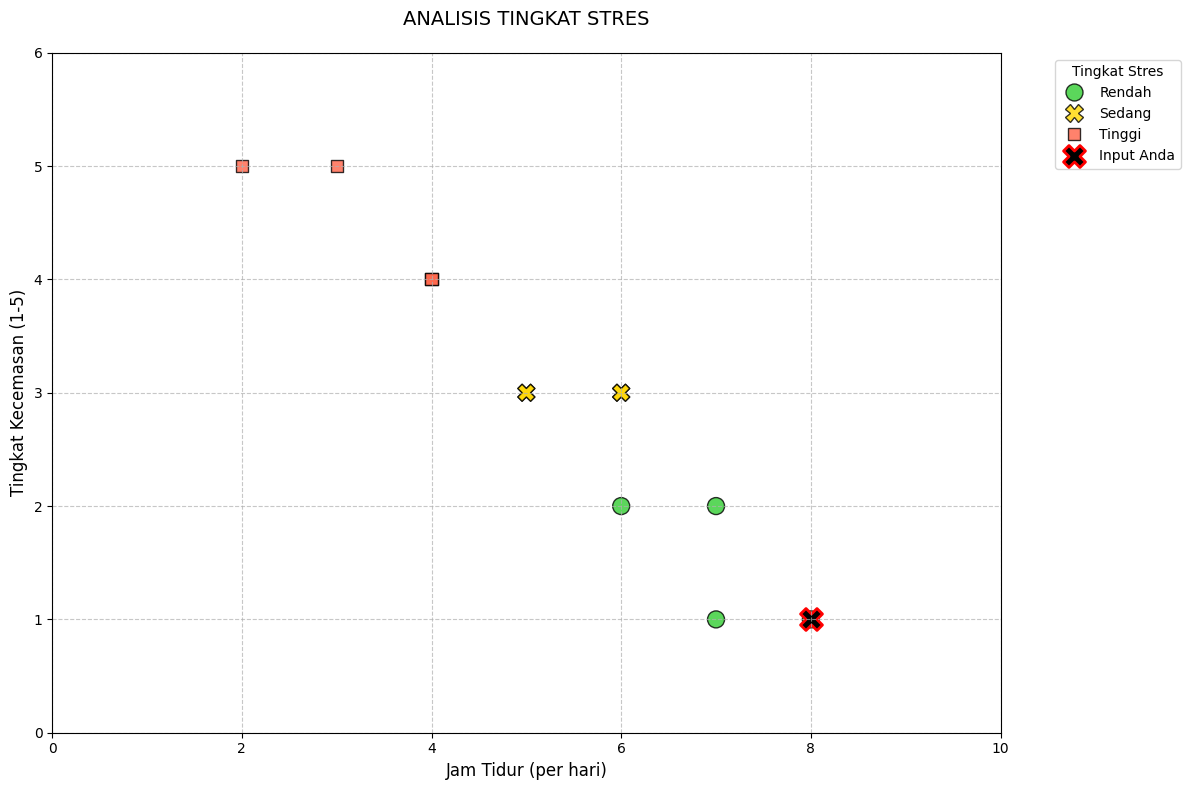

<ipython-input-2-e1d077e8f9ca>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stres', y=features[i], palette=palette)
<ipython-input-2-e1d077e8f9ca>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stres', y=features[i], palette=palette)
<ipython-input-2-e1d077e8f9ca>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stres', y=features[i], palette=palette)


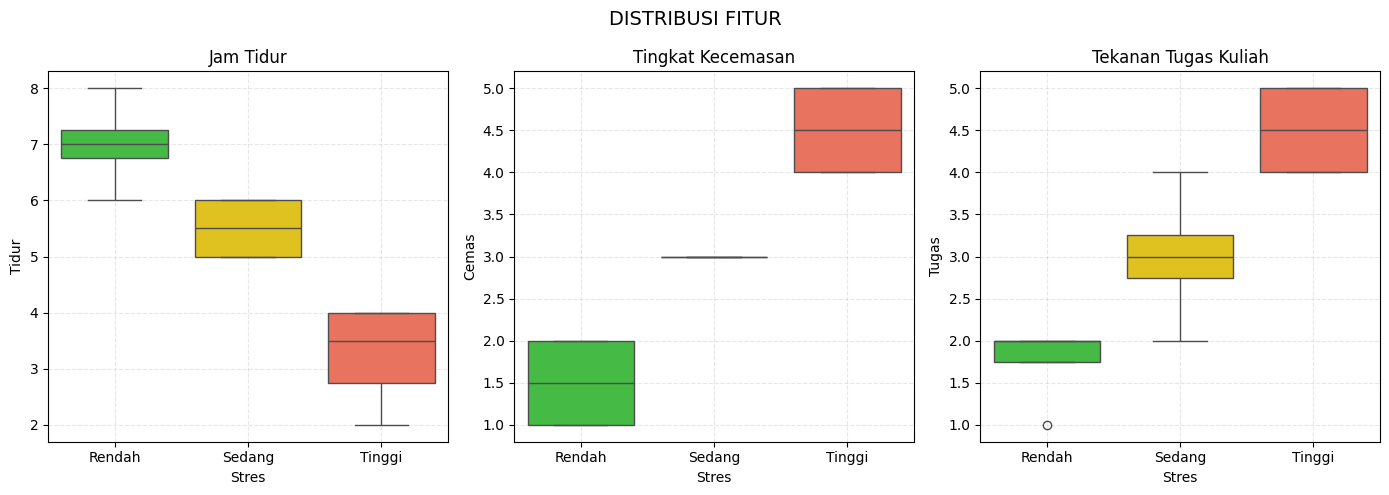

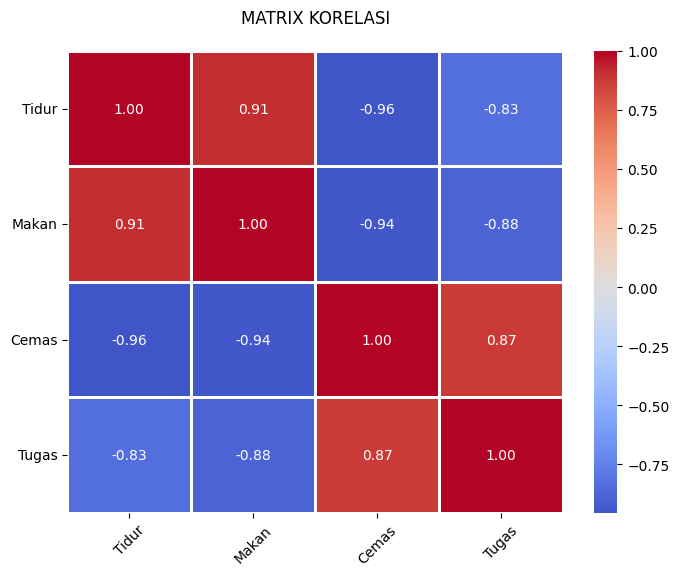

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


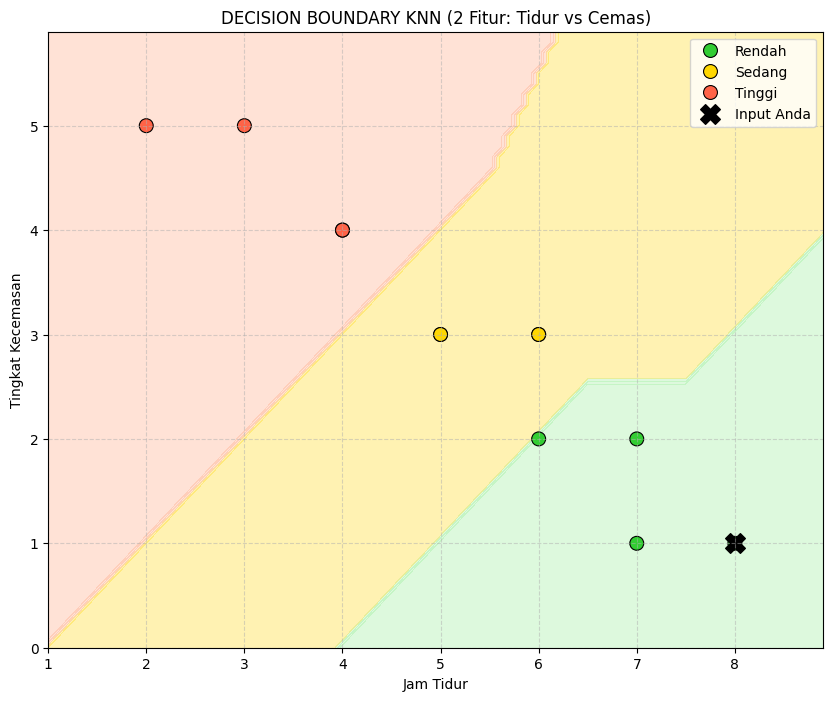

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

# Data dan Label
data = [
    [8, 4, 1, 2], [7, 3, 2, 2], [6, 3, 3, 3], [5, 2, 3, 4],
    [4, 2, 4, 5], [3, 1, 5, 5], [6, 4, 2, 2], [5, 3, 3, 3],
    [7, 4, 1, 1], [2, 1, 5, 4], [6, 3, 3, 2], [4, 2, 4, 4]
]
labels = ['Rendah', 'Rendah', 'Sedang', 'Sedang', 'Tinggi', 'Tinggi',
          'Rendah', 'Sedang', 'Rendah', 'Tinggi', 'Sedang', 'Tinggi']  # Diperbaiki typo 'SeXdang'

# Model Machine Learning
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(data, labels)

model_nb = GaussianNB()
model_nb.fit(data, labels)

# Input Pengguna
print("\nMasukkan data:")
tidur = int(input("Jam Tidur (0-10): "))
makan = int(input("Skor Pola Makan (1-5): "))
cemas = int(input("Skor Kecemasan (1-5): "))
tugas = int(input("Skor Tekanan Tugas Kuliah (1-5): "))
input_user = [[tidur, makan, cemas, tugas]]

# Prediksi
hasil_knn = model_knn.predict(input_user)[0]
hasil_nb = model_nb.predict(input_user)[0]

# Hasil Prediksi
print("\n" + "="*50)
print(f"{'HASIL PREDIKSI':^50}")
print("="*50)
print(f"{'[ KNN ]':<20} Prediksi Tingkat Stres: \033[1m{hasil_knn}\033[0m")
print(f"{'[ Naive Bayes ]':<20} Prediksi Tingkat Stres: \033[1m{hasil_nb}\033[0m")
print("="*50 + "\n")

# Visualisasi Data
df = pd.DataFrame(data, columns=['Tidur', 'Makan', 'Cemas', 'Tugas'])
df['Stres'] = labels
palette = {'Rendah': 'limegreen', 'Sedang': 'gold', 'Tinggi': 'tomato'}

# Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Tidur', y='Cemas', hue='Stres', style='Stres',
                palette=palette, s=150, edgecolor='black', alpha=0.8)
plt.scatter(tidur, cemas, color='black', marker='X', s=250, linewidths=2,
            edgecolor='red', label='Input Anda')
plt.title("ANALISIS TINGKAT STRES", fontsize=14, pad=20)
plt.xlabel("Jam Tidur (per hari)", fontsize=12)
plt.ylabel("Tingkat Kecemasan (1-5)", fontsize=12)
plt.legend(title='Tingkat Stres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 10)
plt.ylim(0, 6)
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(14, 5))
plt.suptitle("DISTRIBUSI FITUR", fontsize=14)

features = ['Tidur', 'Cemas', 'Tugas']
titles = ["Jam Tidur", "Tingkat Kecemasan", "Tekanan Tugas Kuliah"]

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='Stres', y=features[i], palette=palette)
    plt.title(titles[i])
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Heatmap Korelasi
plt.figure(figsize=(8, 6))
corr = df[['Tidur', 'Makan', 'Cemas', 'Tugas']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,
            linewidths=1, linecolor='white', fmt=".2f")
plt.title("MATRIX KORELASI", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Decision Boundary KNN
plt.figure(figsize=(10, 8))
x_min, x_max = df['Tidur'].min() - 1, df['Tidur'].max() + 1
y_min, y_max = df['Cemas'].min() - 1, df['Cemas'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

model_knn_2d = KNeighborsClassifier(n_neighbors=3)
model_knn_2d.fit(df[['Tidur', 'Cemas']], labels)

Z = model_knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
# Konversi label ke numerik untuk plotting
label_map = {'Rendah': 0, 'Sedang': 1, 'Tinggi': 2}
Z = np.array([label_map[x] for x in Z])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#90EE90', '#FFD700', '#FFA07A'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

sns.scatterplot(data=df, x='Tidur', y='Cemas', hue='Stres',
               palette=palette, s=100, edgecolor='black')
plt.scatter(tidur, cemas, color='black', marker='X', s=200, label='Input Anda')
plt.title("DECISION BOUNDARY KNN (2 Fitur: Tidur vs Cemas)", fontsize=12)
plt.xlabel("Jam Tidur")
plt.ylabel("Tingkat Kecemasan")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()